In [8]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
Image.MAX_IMAGE_PIXELS = None
import os
from openslide import OpenSlide
from matplotlib import pyplot as plt

from skimage import measure
from copy import deepcopy
import cv2


In [9]:
# read annotation
csvobj = pd.read_pickle('1C1.pkl')
# read image size
impth = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\c1\1C1.ndpi'
imageobj = OpenSlide(impth)
image_size = imageobj.dimensions
(width,height) = image_size
img = Image.new('L', (round(width), round(height)), 0) #0 for default pixel value

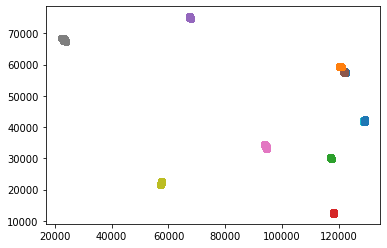

In [10]:
iter_order = [2,10,5,4,6,11,7,9,8,12,3,1]
for i in iter_order:
    row = csvobj.iloc[i - 1]
    color = i
    xycoord = np.squeeze(row['Coord'].astype('uint32'))
    plt.scatter(xycoord[:,0],xycoord[:,1]) #(x,y) this is right because (0,0) is the bottom left of the plot
    xycoord = list(zip(xycoord[:,0],xycoord[:,1])) #turn [[,]] into tuples (x,y)
    ImageDraw.Draw(img).polygon(xycoord, outline=None, fill=color) #this fill value should be class ID

In [11]:
#img2 = img.resize((width,height),resample=0) #nearest method to preserve pixel value, 0=NEAREST
dstfn = '1C1.png'
img.save(dstfn)